In [9]:
# 부스팅(회귀)
import pandas as pd 
df = pd.read_csv('data/kc_house_data.csv')
df = df.drop(['id','date'], axis=1)

X = df.drop('price',axis=1)
y = df['price']

X = pd.get_dummies(data = X, columns=['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [5]:
# learning_rate가 클수록 과소적합, 작을수록 과대적합 가능성 > learning_rate 찾는게 중요

In [10]:
from sklearn.ensemble import AdaBoostRegressor # Ada 부스팅

reg = AdaBoostRegressor()

reg = reg.fit(X_train, y_train)

y_pred = reg.predict(X_test) # y_pred == y^

In [11]:
reg.get_params() # 'base_estimator': None > decision tree 사용한다.

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [15]:
print("train정확도 : ", reg.score(X_train, y_train))
print("test 정확도 : ", reg.score(X_test, y_test))

# 결과는 과소적합

train정확도 :  0.3125695798129794
test 정확도 :  0.2774115414565367


In [16]:
# learning_rate은 1보다 작아야 되기 때문에 range 함수 사용 X
import numpy as np 
np.arange(0.01, 0.1, 0.02)

array([0.01, 0.03, 0.05, 0.07, 0.09])

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':np.arange(0.01, 0.1, 0.02)}
model_grid_boost = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)
model_grid_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09])})

In [18]:
model_grid_boost.best_estimator_

AdaBoostRegressor(learning_rate=0.06999999999999999)

In [19]:
model_grid_boost.best_estimator_.score(X_train,y_train)

0.6413239201020187

In [20]:
model_grid_boost.best_estimator_.score(X_test,y_test)

0.612573669743756

In [21]:
## 변수의 중요도 확인
import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_boost.best_estimator_.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,sqft_living,0.609694
1,grade,0.295479
2,yr_built,0.030640
3,view,0.023640
4,sqft_lot15,0.011195
5,waterfront_river_view,0.007369
6,waterfront_standard,0.007335
7,sqft_lot,0.007044
8,sqft_above,0.002765
9,sqft_living15,0.001980


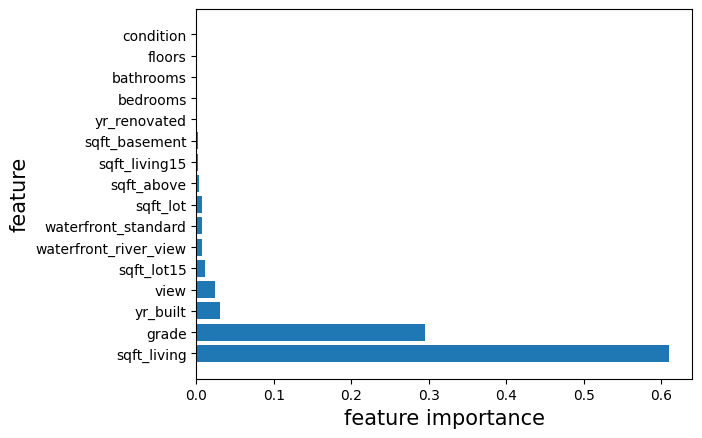

In [22]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [23]:
# 부스팅은 배깅과 랜덤포레스트와 다르게, 회귀계수에 영향을 많이 주는 변수들만 추출, 발전 시킨다.
# 즉, 영향을 미치는 변수와, 안미치는 변수간 차이가 극단적이다.
# 만약 영향을 미치는 변수가 실제로 많은 영향을 미친다면, 좋은 모델이 되겠지만
# 그렇지 않다면 성능이 좋지 못한 모델이 된다.
# 다른 모델로 성능이 좋았을 때, 조금 더 성능을 높이고자 사용한다.

In [24]:
# 부스팅(분류)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
133,3,26,2,1,1453,18,3,1,1,1,1,1,3,1,3,2,2,1,1,1
464,2,24,1,1,7472,12,4,1,1,1,1,1,1,1,1,2,2,2,4,1
919,1,46,3,2,6331,48,1,4,1,4,1,1,4,3,3,2,3,4,1,2
865,3,39,3,2,1271,15,3,4,1,2,1,1,3,3,3,2,3,4,4,2
352,3,46,2,2,7629,48,4,3,2,4,1,1,4,1,4,1,3,2,4,1


In [3]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

adab = AdaBoostClassifier()
adab= adab.fit(X_train, y_train)

xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False) # mlogloss 없으면 오류, use_label_encoder = True > 명목형 변수를 수치형으로 바로 변환
xgb = xgb.fit(X_train, y_train)

y_pred_adab = adab.predict(X_test)
print("정확도 : ", adab.score(X_train, y_train))
print("정확도 : ", adab.score(X_test, y_test))
print("\n")

y_pred_xgb = xgb.predict(X_test) # 과적합
print("정확도 : ", xgb.score(X_train, y_train))
print("정확도 : ", xgb.score(X_test, y_test))

정확도 :  0.7957142857142857
정확도 :  0.74


정확도 :  1.0
정확도 :  0.7433333333333333


In [5]:
adab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [6]:
## 조정을 해줄 수 있는 파라미터 : n_estimators, max_depth, learning_rate
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [7]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
param_grid = {'learning_rate':np.arange(0.5, 1.5, 0.1)}
model_grid_adaboost = GridSearchCV(AdaBoostClassifier(n_estimators=100), param_grid, cv=5)
model_grid_adaboost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'learning_rate': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4])})

In [8]:
param_grid = {'max_depth': [3,4,5],'learning_rate':np.arange(0.01, 0.1, 0.02)}
model_grid_xgboost = GridSearchCV(XGBClassifier(eval_metric='mlogloss',use_label_encoder=False), param_grid, cv=5)
model_grid_xgboost.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09]),
                         'max_depth': [3, 4, 5]})

In [9]:
model_grid_adaboost.best_estimator_

AdaBoostClassifier(learning_rate=0.6, n_estimators=100)

In [10]:
model_grid_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.049999999999999996,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [11]:
print("AdaBoost")
print(model_grid_adaboost.best_estimator_.score(X_train,y_train))
print(model_grid_adaboost.best_estimator_.score(X_test,y_test))


print("\n")
print("XGBoost")
print(model_grid_xgboost.best_estimator_.score(X_train,y_train))
print(model_grid_xgboost.best_estimator_.score(X_test,y_test))

AdaBoost
0.8114285714285714
0.7466666666666667


XGBoost
0.8842857142857142
0.74


In [15]:
# 분류분석이기 때문에 단순히 Score로 XGBoost가 더 성능이 좋다고 해석하면 안된다.

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


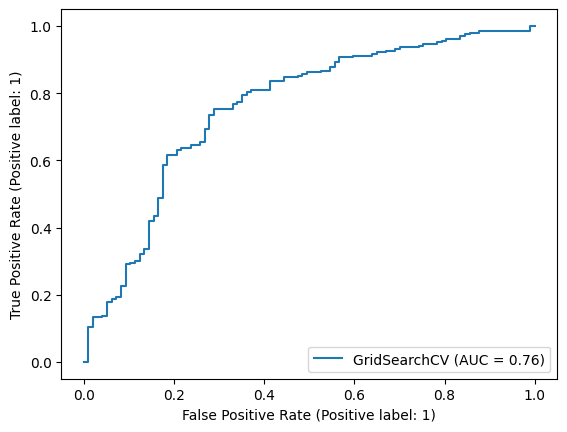

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


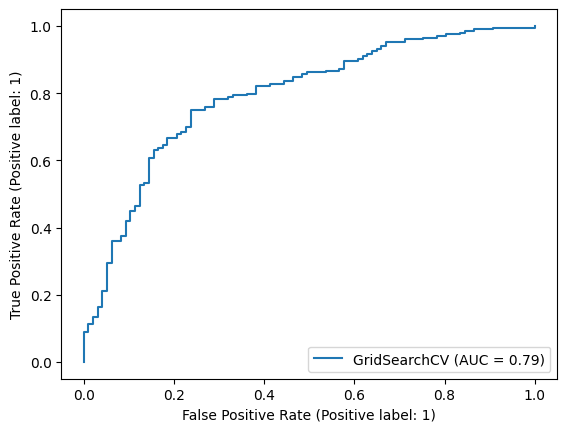

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_grid_adaboost, X_test, y_test)
plt.show()

plot_roc_curve(model_grid_xgboost, X_test, y_test)
plt.show()

In [16]:
# ROC_AUC 값까지 비교했을 때, XGBoost가 성능이 더 좋다고 판단가능하다.
# XGBoost가 FALSE값을 더 잘 맞췄기 때문이다.

In [17]:
# 스태킹(예측값을 가지고 다시 재 모델링) > 캐글에서 마지막 성능향상할 때 많이 사용
y_pred_adab = model_grid_adaboost.best_estimator_.predict(X_test)
y_pred_xgb = model_grid_xgboost.best_estimator_.predict(X_test)

In [18]:
temp_data = pd.concat([pd.Series(y_pred_adab),pd.Series(y_pred_xgb)],axis=1)

In [19]:
temp_data.columns = ['Ada','XGB']
temp_data

,Ada,XGB
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
295,1,0
296,1,1
297,1,1
298,1,1


In [20]:
xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb.fit(temp_data,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
y_pred_staking = xgb.predict(temp_data)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


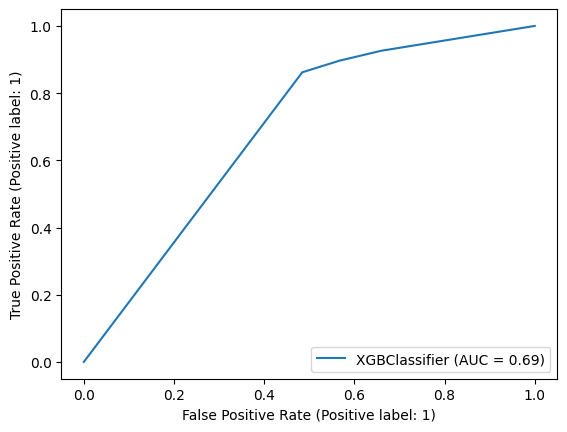

In [22]:
plot_roc_curve(xgb, temp_data,y_test)

In [ ]:
# 배깅, 랜덤 포레스트, 부스팅의 장/단점을 명확히 알고, 적재적소에 사용하자.